In [1]:
import pandas as pd

In [20]:
#membaca file csv
order_df= pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

#shape data dari dataset
print(order_df.shape)

(49999, 12)
product_weight_gram    1550.0
dtype: float64


In [15]:
#membaca dataframe
print(order_df.head(10))
print(order_df.tail(5))


                           order_id  quantity  \
0  2e7a8482f6fb09756ca50c10d7bfc047         2   
1  2e7a8482f6fb09756ca50c10d7bfc047         1   
2  e5fa5a7210941f7d56d0208e4e071d35         1   
3  3b697a20d9e427646d92567910af6d57         1   
4  71303d7e93b399f5bcd537d124c0bcfa         1   
5  be5bc2f0da14d8071e2d45451ad119d9         1   
6  0a0837a5eee9e7a9ce2b1fa831944d27         1   
7  1ff217aa612f6cd7c4255c9bfe931c8b         1   
8  22613579f7d11cc59c4347526fc3c79e         1   
9  356b492aba2d1a7da886e54e0b6212b7         1   

                         product_id    price  \
0  f293394c72c9b5fafd7023301fc21fc2  1489000   
1  c1488892604e4ba5cff5b4eb4d595400  1756000   
2  f3c2d01a84c947b078e32bbef0718962  1707000   
3  3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4  d2998d7ced12f83f9b832f33cf6507b6  3833000   
5  fd7fd78fd3cbc1b0a6370a7909c0a629  1480000   
6  583916a5dae918f5e89baec139141c54  4489000   
7  33430c5c1027d812b5c62f778e5ee7f7   822000   
8  3ff81cd0e0861e991bb0106c0

In [16]:
# Quick summary  dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000


In [17]:
# Median median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:,"price"].median())

2610000.0


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

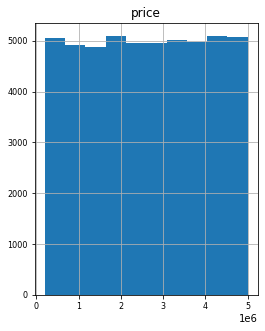

In [18]:
# plot histogram kolom: price
order_df[["price"]].hist(figsize=(4,5), bins=10, xlabelsize=8, ylabelsize=8)

In [19]:
# Varians kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].var()
order_df.loc[:, "product_weight_gram"].std()

3929.8968753726213

In [21]:
# Hitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3-Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


In [22]:
# Ganti nama kolom freight_value menjadi shipping_cost
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
print(order_df)

                               order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...                                 ...      ...   

In [23]:
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [27]:
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="customer", ascending=False)
print(sort_harga)

KeyError: 'customer'

FileNotFoundError: [Errno 2] No such file or directory: 'order.csv'